In [1]:
import torch
import matplotlib.pyplot as plt
import os

from config import config
from utils.dataset import HeartDataset, normalise_zero_one
from utils.visualization import show_imgs, show_pred_mask
from utils.tester import tester_heart
from TransUNet.networks.vit_seg_modeling import VisionTransformer as ViT_seg
from TransUNet.networks.vit_seg_modeling import CONFIGS as CONFIGS_ViT_seg

In [2]:
def load_model(model_weight_pth):
    vit_name = 'R50-ViT-B_16'
    img_size = 224
    vit_patches_size = 16
    config_vit = CONFIGS_ViT_seg[vit_name]
    config_vit.n_classes = 2
    config_vit.n_skip = 3
    
    if vit_name.find('R50') != -1:
        config_vit.patches.grid = (
        int(img_size / vit_patches_size), int(img_size / vit_patches_size))
        
    net = ViT_seg(config_vit, img_size, num_classes=config_vit.n_classes)
    config_vit.pretrained_path = config.model_pth
    net.load_from(weights=np.load(config_vit.pretrained_path))
    
    net.load_state_dict(torch.load(model_weight_pth))
    
    return net

def test(config, tt_csv, model_weight_pth):
    model = load_model(model_weight_pth).to('cuda')
    loss_ls, loss_ce_ls = tester_heart(config.inp_dir, config.lab_dir,
                                       tt_csv,
                                       model, batch_size=2)
    avg_loss = np.array(loss_ls).mean()
    avg_loss_ce = np.array(loss_ce_ls).mean()
    print(f'avg_loss: {avg_loss}, avg_loss_ce: {avg_loss_ce}')
    
def prediction(model, x):
    model.eval()
    x = torch.from_numpy(np.stack((x,x,x),0)).unsqueeze(0).float().cpu() 
    with torch.no_grad():
        pred = model(x).cpu()
    return pred.squeeze(0).numpy()

def threshold(x, ratio):
    x[x < ratio] = 0
    return x

In [3]:
# load data
ds = HeartDataset(config.inp_dir, config.lab_dir, config.tt_csv)
print(len(ds))

3342


In [4]:
# load model
model_weight_pth = 'model/eval_model/ds3_bs4/epoch_8.pth'
model = load_model(model_weight_pth)

(224, 224)
(224, 224)
ID00367637202296290303449


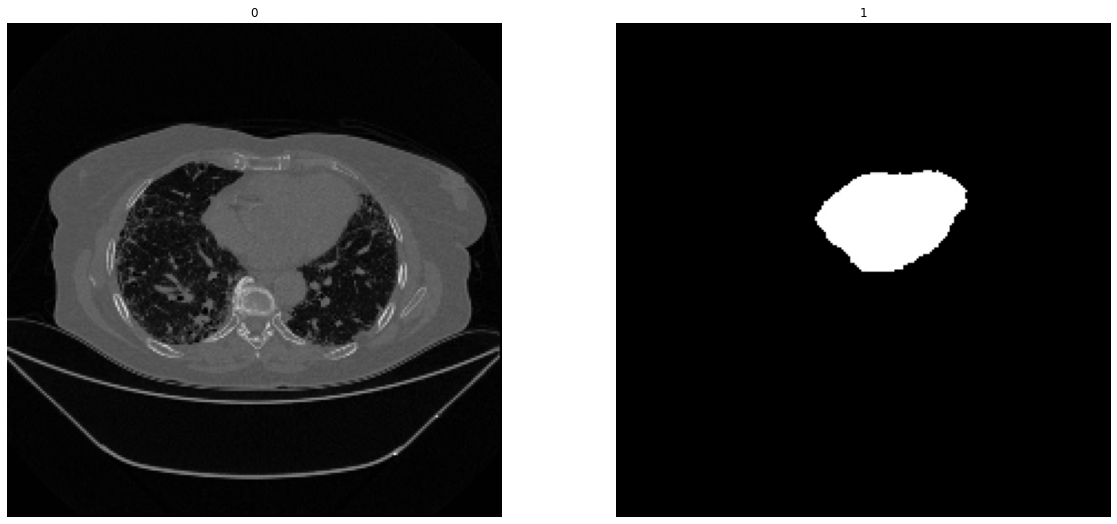

In [5]:
# heart idx 50, 400, 750
sample = ds.__getitem__(750)
image = sample['image']
label = sample['label']
case = sample['case_name']

print(image.shape)
print(label.shape)
print(case)
show_imgs([image, label], cols=2)

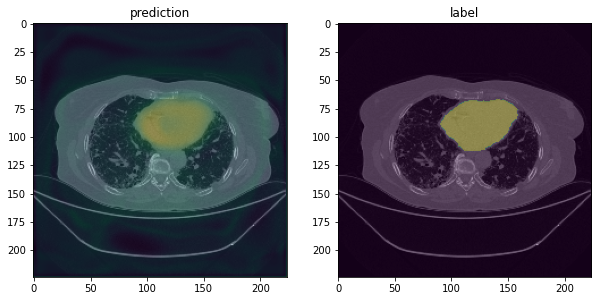

In [6]:
pred = prediction(model, image)
p1 = pred[0]
p2 = pred[1]
show_pred_mask(image, label, p2)

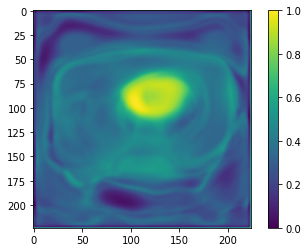

In [7]:
plt.imshow(normalise_zero_one(p2))
plt.colorbar()

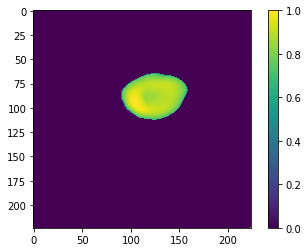

In [8]:
out =  threshold(normalise_zero_one(p2), ratio=0.7)
plt.imshow(out)
plt.colorbar()

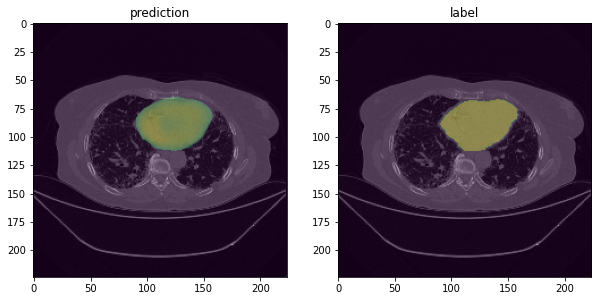

In [9]:
show_pred_mask(image, label, out)

In [94]:
model_weight_pth = 'model/eval_model/ds2_bs12/model_ckp_ds2_68.pth'
tt_csv = r'D:\home\school\ntut\lab\project\HeartSeg\data_csv\tt.csv'
test(config, tt_csv, model_weight_pth)

The length of train set is: 3342


100%|███████████| 1671/1671 [05:26<00:00,  5.12it/s, l:0.25,l_ce:0.00]

avg_loss: 0.24071850310977636, avg_loss_ce: 0.04729428339110997


In [95]:
model_weight_pth = 'model/eval_model/ds3_bs12/epoch_ds3_9_E.pth'
tt_csv = r'D:\home\school\ntut\lab\project\HeartSeg\data_csv\tt.csv'
test(config, tt_csv, model_weight_pth)

The length of train set is: 3342


100%|███████████| 1671/1671 [04:39<00:00,  5.98it/s, l:0.25,l_ce:0.00]

avg_loss: 0.24538736955838458, avg_loss_ce: 0.04871818224746828


In [96]:
model_weight_pth = 'model/eval_model/ds3_bs4/epoch_8.pth'
tt_csv = r'D:\home\school\ntut\lab\project\HeartSeg\data_csv\tt.csv'
test(config, tt_csv, model_weight_pth)

The length of train set is: 3342


100%|███████████| 1671/1671 [04:30<00:00,  6.17it/s, l:0.25,l_ce:0.00]

avg_loss: 0.22393584651688592, avg_loss_ce: 0.027181019828779393


In [97]:
model_weight_pth = 'model/eval_model/L_model_ckp_ds3_2_b4.pth'
tt_csv = r'D:\home\school\ntut\lab\project\HeartSeg\data_csv\tt.csv'
test(config, tt_csv, model_weight_pth)

The length of train set is: 3342


100%|███████████| 1671/1671 [04:31<00:00,  6.15it/s, l:0.26,l_ce:0.01]

avg_loss: 0.22270293398924676, avg_loss_ce: 0.033269051287510225


In [15]:
model_weight_pth = 'model/eval_model/ds3_bs12/epoch_ds3_2_A.pth'
tt_csv = r'D:\home\school\ntut\lab\project\HeartSeg\data_csv\A\tt_A.csv'
test(config, tt_csv, model_weight_pth)

The length of train set is: 3341


100%|███████████| 1671/1671 [05:45<00:00,  4.83it/s, l:0.25,l_ce:0.00]


avg_loss: 0.24371874380805478, avg_loss_ce: 0.025985302256952798


In [16]:
model_weight_pth = 'model/eval_model/ds3_bs12/epoch_ds3_2_B.pth'
tt_csv = r'D:\home\school\ntut\lab\project\HeartSeg\data_csv\B\tt_B.csv'
test(config, tt_csv, model_weight_pth)

The length of train set is: 3341


100%|███████████| 1671/1671 [05:10<00:00,  5.39it/s, l:0.25,l_ce:0.00]

avg_loss: 0.26405413543559136, avg_loss_ce: 0.06038144892004635


In [17]:
model_weight_pth = 'model/eval_model/ds3_bs12/epoch_ds3_2_C.pth'
tt_csv = r'D:\home\school\ntut\lab\project\HeartSeg\data_csv\C\tt_C.csv'
test(config, tt_csv, model_weight_pth)

The length of train set is: 3341


100%|███████████| 1671/1671 [05:10<00:00,  5.38it/s, l:0.07,l_ce:0.06]

avg_loss: 0.25702274669650643, avg_loss_ce: 0.03374235282582691


In [18]:
model_weight_pth = 'model/eval_model/ds3_bs12/epoch_ds3_2_D.pth'
tt_csv = r'D:\home\school\ntut\lab\project\HeartSeg\data_csv\D\tt_D.csv'
test(config, tt_csv, model_weight_pth)

The length of train set is: 3341


100%|███████████| 1671/1671 [05:26<00:00,  5.11it/s, l:0.25,l_ce:0.00]

avg_loss: 0.231923860562982, avg_loss_ce: 0.027083921635378948


In [19]:
model_weight_pth = 'model/eval_model/ds3_bs12/epoch_ds3_2_E.pth'
tt_csv = r'D:\home\school\ntut\lab\project\HeartSeg\data_csv\E\tt_E.csv'
test(config, tt_csv, model_weight_pth)

The length of train set is: 3344


100%|███████████| 1672/1672 [05:46<00:00,  4.83it/s, l:0.25,l_ce:0.00]

avg_loss: 0.23376034571160897, avg_loss_ce: 0.03326026462306047
